# Introduction to scatter plots

This lesson will introduce scatter plots and how to make them in several different ways.

We will start buy importing the ANSS earthquake catalog which you can download [here](http://www.quake.geo.berkeley.edu/anss/catalog-search.html).

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('data/anss.csv', delim_whitespace=True)

In [3]:
df.head()

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event,ID
0,2002/01/01,10:39:06.82,-55.214,-129.000,10.0,6.0,Mw,78,1.07,NEI,2.002010e+11,NaN,NaN,NaN
1,2002/01/01,11:29:22.73,6.303,125.650,138.1,6.3,Mw,236,0.90,NEI,2.002010e+11,NaN,NaN,NaN
2,2002/01/01,19:53:06.95,-27.875,73.883,10.0,5.6,Mw,27,0.88,NEI,2.002010e+11,NaN,NaN,NaN
3,2002/01/01,21:25:20.02,-27.874,74.007,10.0,5.1,Mw,21,0.34,NEI,2.002010e+11,NaN,NaN,NaN
4,2002/01/01,23:13:45.20,-27.945,74.156,10.0,5.1,Mw,21,0.85,NEI,2.002010e+11,NaN,NaN,NaN


What are these columns?

Some are self explanatory but some are not:

* Magt - the way the magnitude was calculated
* Nst - the number of stations that detected the earthquake
* RMS - root mean square
* 


In [4]:
df.describe()

,Lat,Lon,Depth,Mag,Nst,RMS,Event,ID
count,9998.000000,9998.000000,9998.000000,9998.00000,9998.000000,9.947000e+03,1.800000e+01,0.0
mean,0.506756,45.405202,57.593392,5.37223,164.561112,1.999149e+11,1.652515e+07,NaN
std,28.593770,119.249236,105.808366,0.41369,136.695802,1.062330e+10,1.697042e+07,NaN
min,-65.712000,-179.994000,-0.530000,5.00000,0.000000,4.000000e-02,1.129580e+05,NaN
25%,-18.294750,-69.652500,10.000000,5.10000,64.000000,2.003112e+11,5.434046e+06,NaN
50%,-2.424500,96.392500,30.000000,5.20000,121.000000,2.005033e+11,5.793165e+06,NaN
75%,18.309500,142.318750,45.300000,5.50000,224.000000,2.006091e+11,2.149626e+07,NaN
max,86.276000,179.998000,691.600000,9.00000,929.000000,2.007103e+11,5.118347e+07,NaN


Scatter plots are used to look at how two variables compare. For example, does the Magnitude of the earthquake correlate in some way to the number of stations that detected it?

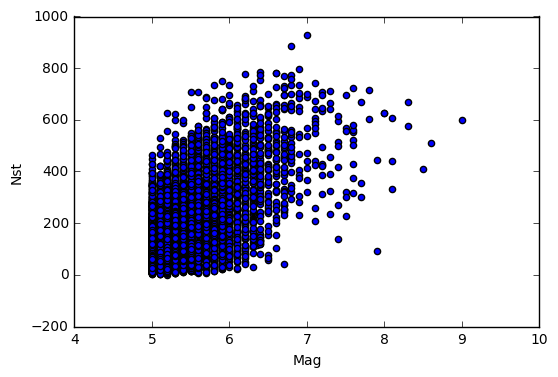

In [5]:
df.plot(kind='scatter', x='Mag', y='Nst')

We can clean this plot up a lot though. Lets start by looking at the machinery that creates it.

In [6]:
import matplotlib.pyplot as plt

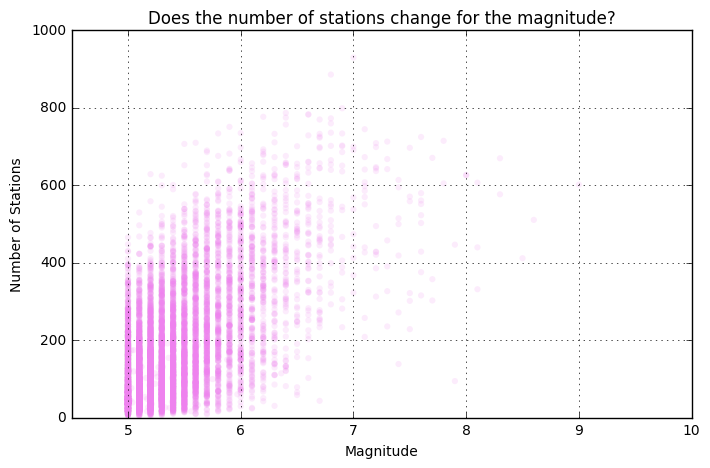

In [7]:
fig, ax = plt.subplots(1, figsize=(8,5))

df.plot(ax=ax, kind='scatter', x='Mag', y='Nst', alpha=0.15, edgecolor='None'
       ,color='violet')

ax.set_ylim(0, 1000)
ax.set_xlim(4.5, 10)
ax.grid(True)
ax.set_title('Does the number of stations change for the magnitude?')

ax.set_ylabel('Number of Stations')
ax.set_xlabel('Magnitude')

# Gutenberg-Richter plots

In seismology, the Gutenberg–Richter law expresses the relationship between the magnitude and total number of earthquakes (that is the distribution) in any given region and time period of at least that magnitude.

$log_{10}N = a -bM$

or

$N = 10^{a-bM}$

Where:

* $N$  is the number of events having a magnitude, $\geq M$ 
* $a$  and $b$  are constants.

It is assumed to be poissonian.

To create the Gutenburg-Richter distribution of the earthquake magnitudes from the ANSS catalog, we are going to use numpy.

In [8]:
import numpy as np

In [9]:
df.Mag.values.round(1)

array([ 6. ,  6.3,  5.6, ...,  5.5,  5. ,  5.5])

In [10]:
hist, edges = np.histogram(a=df.Mag.values.round(1), bins=101, range=(0,10))
chist = np.cumsum(hist[::-1])[::-1]

In [11]:
edges

array([  0.        ,   0.0990099 ,   0.1980198 ,   0.2970297 ,
         0.3960396 ,   0.4950495 ,   0.59405941,   0.69306931,
         0.79207921,   0.89108911,   0.99009901,   1.08910891,
         1.18811881,   1.28712871,   1.38613861,   1.48514851,
         1.58415842,   1.68316832,   1.78217822,   1.88118812,
         1.98019802,   2.07920792,   2.17821782,   2.27722772,
         2.37623762,   2.47524752,   2.57425743,   2.67326733,
         2.77227723,   2.87128713,   2.97029703,   3.06930693,
         3.16831683,   3.26732673,   3.36633663,   3.46534653,
         3.56435644,   3.66336634,   3.76237624,   3.86138614,
         3.96039604,   4.05940594,   4.15841584,   4.25742574,
         4.35643564,   4.45544554,   4.55445545,   4.65346535,
         4.75247525,   4.85148515,   4.95049505,   5.04950495,
         5.14851485,   5.24752475,   5.34653465,   5.44554455,
         5.54455446,   5.64356436,   5.74257426,   5.84158416,
         5.94059406,   6.03960396,   6.13861386,   6.23

In [12]:
hist

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2045, 1611, 1407, 1052,  843,
        666,  508,  405,  295,  250,  203,  169,  121,   93,   72,   51,
         47,   40,   25,   16,   10,   12,   11,    7,    7,    6,    9,
          3,    2,    2,    2,    3,    0,    2,    0,    1,    1,    0,
          0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0])

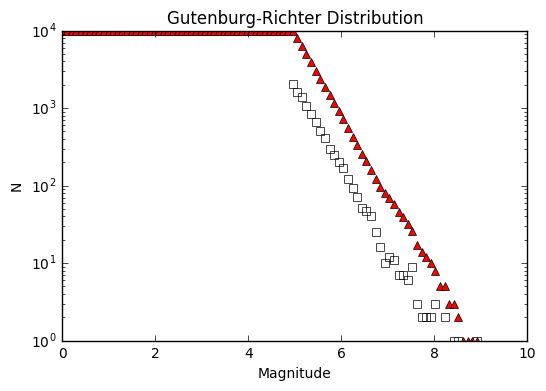

In [13]:
fig, ax = plt.subplots()

ax.plot(edges[:-1], hist, marker='s', color='None', linestyle='')
ax.plot(edges[:-1], chist, marker='^', color='red', linestyle='')
ax.set_yscale('log')
ax.set_ylabel('N')
ax.set_xlabel('Magnitude')
# ax.set_xlim(4.5, 10)
ax.set_title('Gutenburg-Richter Distribution')

We quite frequently want to plot the fit of the a and b values of the gutenburg richter distribution. To do this we are going to use the equation below which calculates the maximum likelihood of the distribution and returns the parameters:

* a - the "productivity" of the distribution, but really just the y-intercept
* b - the "mean magnitude" but really it's just the slope
* bstdev - the standard deviation of b
* length - the number of earthquakes used to calculate the values

In [14]:
def fmd_values(magnitudes, bin_width=0.1):
    """
    params magnitudes : numpy.array
    params bin_width : float
    
    returns a,b,bstd, n-values if above the earthquake count threshold
    else returns np.nans
    """
    length = magnitudes.shape[0]
    minimum = magnitudes.min()
    average = magnitudes.mean()
    b_value = (1 / (average - (minimum - (bin_width/2)))) * np.log10(np.exp(1))
    square_every_value = np.vectorize(lambda x: x**2)
    b_stddev = square_every_value((magnitudes - average).sum()) / (length * (length - 1))
    b_stddev = 2.3 * np.sqrt(b_stddev) * b_value**2
    a_value = np.log10(length) + b_value * minimum
    
    return a_value, b_value, b_stddev, length

In [15]:
fmd_values(df.Mag.values)

(9.1427739318422674, 1.0285721598851394, 1.5357096869688311e-15, 9998)

In [16]:
a, b, bstd, n = fmd_values(df.Mag.values)

In [17]:
x = np.linspace(0,10, 1000)
y = 10**(a - b*x)

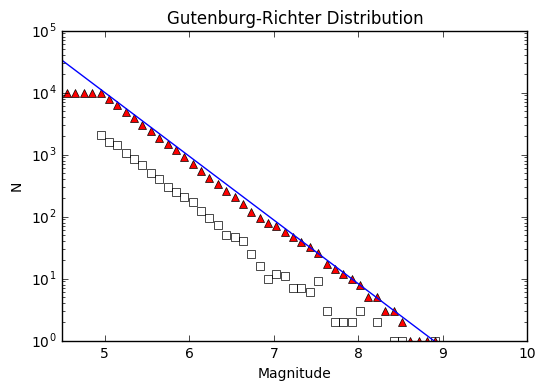

In [18]:
fig, ax = plt.subplots()

ax.plot(edges[:-1], hist, marker='s', color='None', linestyle='')
ax.plot(edges[:-1], chist, marker='^', color='red', linestyle='')

ax.plot(x,y)

ax.set_yscale('log')
ax.set_ylabel('N')
ax.set_xlabel('Magnitude')
ax.set_xlim(4.5, 10)
ax.set_ylim(1e0, 1e5)
ax.set_title('Gutenburg-Richter Distribution')